In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
y = train['SalePrice']
train.drop(['SalePrice'],axis=1,inplace=True)
ylog = np.log(y) # Reduce the variance

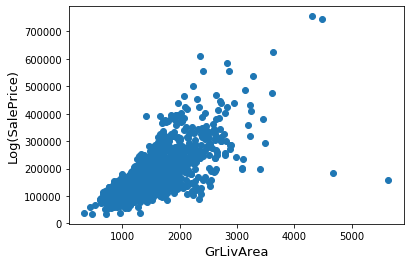

In [2]:
# Examine the outliers
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('Log(SalePrice)', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

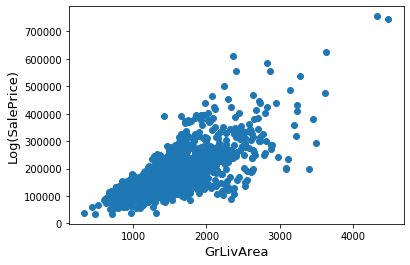

In [3]:
# Remove outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('Log(SalePrice)', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

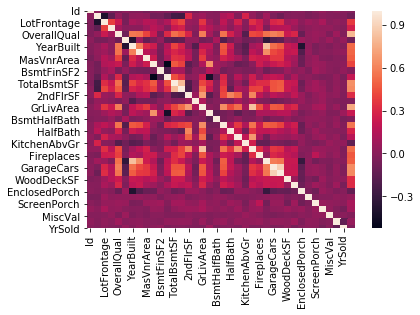

In [4]:
sns.heatmap(train.corr())
drop_cols = ['Id']

In [5]:
# DROP some columns
all_datasets=[train , test]
test_Id = test['Id']
for dataset in all_datasets:
    dataset.drop(columns=drop_cols, inplace=True)

In [6]:
for dataset in all_datasets:
    idx = dataset.MSZoning.isna()
    dataset.loc[idx,'MSZoning'] = 'None'
    dataset.replace({"LotShape": {"Reg": 0, "IR1": 1, "IR2":2, "IR3":3}}, inplace=True)
    dataset['LotShape'] = pd.to_numeric(dataset['LotShape'])
    
    idx = dataset['Utilities'].isna()
    dataset.loc[idx,'Utilities'] = dataset['Utilities'].mode()[0]
    dataset.replace({"Utilities" : {"AllPub":3, "NoSewr":2, "NoSeWa": 1, "ELO": 0}}, inplace=True)
    dataset['Utilities'] = pd.to_numeric(dataset['Utilities'])
    
    dataset.loc[idx,'LandSlope'] = dataset['LandSlope'].mode()[0]
    dataset.replace({"LandSlope" : {"Gtl":0, "Mod":1, "Sev":2}}, inplace=True)
    dataset['LandSlope'] = pd.to_numeric(dataset['LandSlope'])
    
for dataset in all_datasets:
    idx = dataset['Fence'].isna()
    dataset.loc[idx,'Fence'] = 'None'
    idx = dataset['Fireplaces'].isna()
    dataset.loc[idx,'Fireplaces'] = dataset['Fireplaces'].mode()[0]
    idx2 = dataset['MasVnrType'].isna() 
    idx3 = dataset['MasVnrType']==0
    idx = idx2 | idx3
    dataset.loc[idx,'MasVnrType'] = 'None'
    idx = dataset['MasVnrType'].str.contains('None')
    dataset.loc[idx,'MasVnrArea'] = 0
    
    idx = dataset['MiscFeature'].isna()
    dataset.loc[idx,'MiscFeature'] = 'None'

In [7]:
# Clean data, convert to numericals
for dataset in all_datasets:
    idx = dataset['BsmtQual'].isna()
    dataset.loc[idx,'BsmtQual']=0
    idx = dataset['BsmtCond'].isna()
    dataset.loc[idx,'BsmtCond']=0
    idx = dataset['TotalBsmtSF'].isna()
    dataset.loc[idx,'TotalBsmtSF']=0
    dataset.loc[idx,'BsmtUnfSF'] = 0
    idx = dataset['BsmtFullBath'].isna()
    dataset.loc[idx,'BsmtFullBath'] = 0
    idx = dataset['BsmtHalfBath'].isna()
    dataset.loc[idx,'BsmtHalfBath'] = 0
    idx = dataset['BsmtExposure'].isna()
    dataset.loc[idx,'BsmtExposure']=0
    idx = dataset['BsmtFinType1'].isna()
    dataset.loc[idx,'BsmtFinType1']=0
    dataset.loc[idx,'BsmtFinSF1']=0
    idx = dataset['BsmtFinType2'].isna()
    dataset.loc[idx,'BsmtFinType2']=0
    dataset.loc[idx,'BsmtFinSF2']=0
    dataset.replace({'BsmtQual': { 'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5 }}, inplace=True)
    dataset.replace({'BsmtCond': { 'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5 }}, inplace=True)
    dataset.replace({'BsmtExposure': { 'No':1,'Mn':2,'Av':3,'Gd':4}}, inplace=True)
    dataset.replace({'BsmtFinType1': {'Unf':1,'LwQ':2,'Rec':3,'BLQ':4, 'ALQ':5, 'GLQ':6 }}, inplace=True)
    dataset.replace({'BsmtFinType2': { 'Unf':1,'LwQ':2,'Rec':3,'BLQ':4, 'ALQ':5, 'GLQ':6 }}, inplace=True)
    dataset['BsmtQual'] = pd.to_numeric(dataset['BsmtQual'])
    dataset['BsmtCond'] = pd.to_numeric(dataset['BsmtCond'])
    
for dataset in all_datasets:
    dataset.replace({'HeatingQC': { 'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5 }}, inplace=True)
    dataset.replace({'KitchenQual': { 'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5 }}, inplace=True)
    idx = dataset['KitchenQual'].isna()
    dataset.loc[idx,'KitchenQual'] = dataset['KitchenQual'].mode()[0]
    dataset.replace({'ExterQual': { 'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5 }}, inplace=True)
    dataset.replace({'ExterCond': { 'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5 }}, inplace=True)
    
    idx1 = dataset['GarageArea']==0
    idx2 = dataset['GarageArea'].isna()
    idx = idx1|idx2 # boolean OR
    dataset.loc[idx,'GarageArea'] = 0
    dataset.loc[idx,'GarageQual']=0
    dataset.loc[idx,'GarageCond']=0
    dataset.loc[idx,'GarageFinish']=0
    dataset.loc[idx,'GarageCars'] = 0
    dataset.loc[idx,'GarageType'] = 'None'
    idx = dataset['GarageYrBlt'].isna()
    dataset.loc[idx,'GarageYrBlt'] = 0
    idx = dataset['GarageQual'].isna()
    dataset.loc[idx,'GarageQual'] = 0 #dataset['GarageQual'].mode().iloc[0]
    idx = dataset['GarageCond'].isna()
    dataset.loc[idx,'GarageCond'] = 0 #dataset['GarageCond'].mode().iloc[0]
    idx = dataset['GarageFinish'].isna()
    dataset.loc[idx,'GarageFinish'] = 0 #dataset['GarageFinish'].mode().iloc[0] 
    dataset.replace({'GarageQual': { 'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5 }}, inplace=True)
    dataset.replace({'GarageCond': { 'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5 }}, inplace=True)
    dataset.replace({'GarageFinish': {'Unf':1, 'RFn':2, 'Fin':3}}, inplace=True)
    dataset.replace({'PavedDrive': {'N': 0, 'P': 1, 'Y': 2}}, inplace=True)
    
    idx = dataset['Functional'].isna()
    dataset.loc[idx,'Functional'] = dataset.Functional.mode()[0]
    dataset.replace({'Functional':{'Sal':0,'Sev':1,'Maj2':2,'Maj1':2,'Mod':3,'Min2':4,'Min1':4,'Typ':5}}, inplace=True)
    
    idx = dataset['Fireplaces']==0
    dataset.loc[idx,'FireplaceQu']=0
    dataset.replace({'FireplaceQu': { 'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5 }}, inplace=True)
    idx1 = dataset['PoolArea']==0
    idx2 = dataset['PoolArea'].isna()
    idx3 = dataset['PoolQC'].isna()
    idx = idx1|idx2|idx3
    dataset.loc[idx,'PoolQC'] = 0
    dataset.replace({'PoolQC': { 'Po':1,'Fa':2,'TA':3,'Gd':4, 'Ex':5 }}, inplace=True)
    
    dataset.replace({'CentralAir':{'N':0,'Y':1}}, inplace=True)
    idx = dataset['Electrical'].isna();
    dataset.loc[idx,'Electrical'] = dataset.Electrical.mode().iloc[0]
    dataset.replace({'Electrical':{'FuseP':1, 'FuseF':2, 'FuseA':3, 'SBrkr':4, 'Mix':2.5}}, inplace=True)
    dataset.replace({'Street':{'Grvl':0, 'Pave':1}}, inplace=True)
    idx = dataset['Alley'].isna()
    dataset.loc[idx,'Alley'] = 0
    dataset.replace({'Alley':{'Grvl':1, 'Pave':2}}, inplace=True)
    
for dataset in all_datasets:
    idx = dataset['SaleType'].isna()
    dataset.loc[idx,'SaleType'] = dataset['SaleType'].mode().iloc[0]
    dataset.replace({'SaleType':{'CWD':'WD', 'VWD':'WD', 'ConLw':'Con','ConLI':'Con','ConLD':'Con'}}, inplace=True)

for dataset in all_datasets:
    idx = dataset['Exterior1st'].isna()
    val = dataset.loc[~idx,'Exterior1st'].mode()
    dataset.loc[idx,'Exterior1st'] = val.iloc[0];
    idx = dataset['Exterior2nd'].isna()
    val = dataset.loc[~idx,'Exterior2nd'].mode()
    dataset.loc[idx,'Exterior2nd'] = val.iloc[0];

In [8]:
train.info()

# Using ML methods to estimate LotFrontage
# Following Eugene Iosifov's work, try using ML methods to estimate LotFrontage
def filling_na_with_predictions(df, feature):
    """
    df - DataFrame without target column y. Train+Test DataFrame (df_all)
    feature - feature (column), containing real NA values we will fill

    Assumption:
    All other columns do not have NA values. In case of having we have to impute with some Statistical method (Median, etc)
    We do not do it inside this function
    """
    if df[feature].isna().sum()>0:
        
    

# Need to fill out LotFrontage
for dataset in all_datasets:
    dataset["LotFrontage"] = dataset.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1458 non-null int64
MSZoning         1458 non-null object
LotFrontage      1199 non-null float64
LotArea          1458 non-null int64
Street           1458 non-null int64
Alley            1458 non-null int64
LotShape         1458 non-null int64
LandContour      1458 non-null object
Utilities        1458 non-null int64
LotConfig        1458 non-null object
LandSlope        1458 non-null int64
Neighborhood     1458 non-null object
Condition1       1458 non-null object
Condition2       1458 non-null object
BldgType         1458 non-null object
HouseStyle       1458 non-null object
OverallQual      1458 non-null int64
OverallCond      1458 non-null int64
YearBuilt        1458 non-null int64
YearRemodAdd     1458 non-null int64
RoofStyle        1458 non-null object
RoofMatl         1458 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non-nul

In [9]:
# All columns that are NOT object will be numeric
kinds = np.array([dt.kind for dt in train.dtypes])
isnumeric = kinds !='O'

all_cols= train.columns.values
numeric_cols = all_cols[isnumeric]
cat_cols = all_cols[~isnumeric]

# Find correlations
# NUMERICS ONLY

a = train.corrwith(y, method='spearman')
keys = a.keys()
values = [a[i] for i in range(0,len(a))]
idx = np.argsort(np.abs(values))
keys = np.array(keys[idx])
values = np.array(values)[idx]

key_col = keys
values_col = values

numeric_cols = key_col
print(numeric_cols)
print(values_col)

# Make training set drop the SalePrice column


['MSSubClass' 'ExterCond' 'BsmtHalfBath' 'Utilities' 'YrSold'
 'BsmtFinType2' 'BsmtFinSF2' 'Street' 'LandSlope' 'MiscVal' 'PoolArea'
 'PoolQC' '3SsnPorch' 'LowQualFinSF' 'MoSold' 'ScreenPorch' 'Alley'
 'OverallCond' 'Functional' 'KitchenAbvGr' 'BsmtUnfSF' 'EnclosedPorch'
 'BsmtFullBath' 'BedroomAbvGr' 'BsmtCond' 'PavedDrive' '2ndFlrSF'
 'Electrical' 'BsmtFinSF1' 'CentralAir' 'LotShape' 'GarageCond' 'HalfBath'
 'BsmtExposure' 'GarageQual' 'WoodDeckSF' 'BsmtFinType1' 'LotFrontage'
 'MasVnrArea' 'LotArea' 'OpenPorchSF' 'HeatingQC' 'Fireplaces'
 'TotRmsAbvGrd' 'FireplaceQu' 'YearRemodAdd' '1stFlrSF' 'TotalBsmtSF'
 'GarageFinish' 'GarageYrBlt' 'FullBath' 'GarageArea' 'YearBuilt'
 'KitchenQual' 'BsmtQual' 'ExterQual' 'GarageCars' 'GrLivArea'
 'OverallQual']
[ 0.00689761  0.01180665 -0.01204499  0.01668177 -0.02974029  0.03996801
 -0.0419258   0.04585771  0.05033623 -0.06270807  0.06363181  0.06368582
  0.06549878 -0.0677123   0.06906709  0.10019703 -0.1222138  -0.12909138
  0.13518188 -0.164

# Start ML Section

In [10]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# FOR CATEGORICAL DATA
cat_si_step = ('si', SimpleImputer(strategy='constant',
                fill_value='None'))
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False,
                handle_unknown='ignore'))
cat_steps = [cat_si_step, cat_ohe_step]
cat_pipe = Pipeline(cat_steps)


# For NUMERICAL DATA
#num_si_step = ('si', SimpleImputer(strategy='median')) # replace NaN with median values
# make mean go to zero and scale variance to 1
# Important for removing bias for variables with larger scale
num_ss_step = ('ss', RobustScaler())
num_steps = [ num_ss_step]
num_pipe = Pipeline(num_steps)

# Put into ColumnTransformer
transformers = [('cat', cat_pipe, cat_cols) , ('num', num_pipe, numeric_cols)]
ct = ColumnTransformer(transformers=transformers)

# TRANSFORM THE TRAINING & TEST SETS
train_ct = ct.fit_transform(train)
train_ct.shape
# ONLY transform the test set -- no fitting
test_ct = ct.transform(test)
test_ct.shape

(1459, 216)

In [11]:
#Regression
from sklearn.linear_model import LinearRegression, Ridge, RANSACRegressor, ElasticNet
from sklearn.model_selection import GridSearchCV

In [12]:
def elastic_score(X,y):
    elastic = ElasticNet(random_state=1)
    param = {'l1_ratio' : [0],
             'alpha' : [0.017]}
    elastic = GridSearchCV(elastic, param, cv=5, scoring='neg_mean_squared_error')
    elastic.fit(X,y)
    print('Elastic:', np.sqrt(elastic.best_score_*(-1) ))
    return elastic

reg = elastic_score(train_ct, ylog)

C:\Users\Daniel_standard\.conda\envs\ML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.853601531583925, tolerance: 0.018911581323821106
  positive)
C:\Users\Daniel_standard\.conda\envs\ML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.6163841079406085, tolerance: 0.017997182782581313
  positive)
C:\Users\Daniel_standard\.conda\envs\ML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.651995706953573, tolerance: 0.0183723256642859
  positive)
C:\Users\Daniel_standard\.conda\envs\ML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

Elastic: 0.11400290323794733


C:\Users\Daniel_standard\.conda\envs\ML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.8191349266503885, tolerance: 0.018809758515164615
  positive)
C:\Users\Daniel_standard\.conda\envs\ML\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.663315393088649, tolerance: 0.023278841646377505
  positive)


In [13]:
# Using ML in missingdata predictions

In [14]:
preds = np.exp(reg.predict(test_ct))

pID = test_Id.astype('int')
preds = preds.astype('int')
solution_dict = {'Id':pID, 'SalePrice':preds}
solutionDF = pd.DataFrame(solution_dict)
solutionDF.to_csv('solution.csv', index=False)